# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')


# Reading Bit Coin Stock Data

In [2]:
btc = pd.read_excel(r'C:\Users\vignesh\Desktop\Stock Data\Bitcoin\BTCLoaded.xlsx',index_col='Date',parse_dates=['Date'])
btc.head()

,Close,Volume,Market Cap
Date,,,
2015-03-01,260.20,25213700,3615181538
2015-03-02,275.67,40465700,3831178959
2015-03-03,281.70,50461300,3916108523
2015-03-04,273.09,41383000,3797385224
2015-03-05,276.18,41302400,3841201000


In [3]:
btc5 = btc['2015':'2020']
btc5.describe()

,Close,Volume,Market Cap
count,1884.000000,1.884000e+03,1.884000e+03
mean,4328.361619,7.164484e+09,7.493273e+10
std,3992.982726,1.067358e+10,6.989099e+10
min,210.490000,1.060090e+07,3.059461e+09
25%,574.267500,7.095970e+07,9.058627e+09
50%,3656.425000,2.099690e+09,6.393887e+10
75%,7430.887500,9.580179e+09,1.316101e+11
max,19497.400000,7.415677e+10,3.265025e+11


# Plotting Close Values

<Figure size 1440x1440 with 0 Axes>

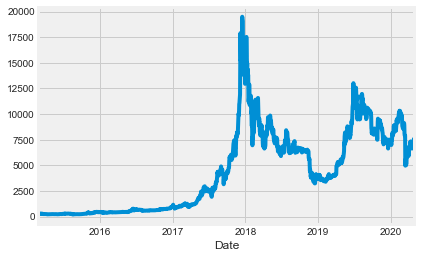

<Figure size 1440x1440 with 0 Axes>

In [4]:
btc5['Close'].plot()
plt.figure(figsize=(20, 20))

Now that we've seen the visualizations for the closing price,let's go ahead and caculate the moving average for the stock.

# Moving average with window size of 5,10,20,50

In [5]:
#CalculatingMovingAverages

ma_day = [5,10,20,50]

for ma in ma_day:
        column_name = f"MA for {ma} days"
        btc5[column_name] = btc5['Close'].rolling(ma).mean()

In [6]:
btc5.head()

,Close,Volume,Market Cap,MA for 5 days,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,
2015-03-01,260.20,25213700,3615181538,NaN,NaN,NaN,NaN
2015-03-02,275.67,40465700,3831178959,NaN,NaN,NaN,NaN
2015-03-03,281.70,50461300,3916108523,NaN,NaN,NaN,NaN
2015-03-04,273.09,41383000,3797385224,NaN,NaN,NaN,NaN
2015-03-05,276.18,41302400,3841201000,273.368,NaN,NaN,NaN


<Figure size 1944x1656 with 0 Axes>

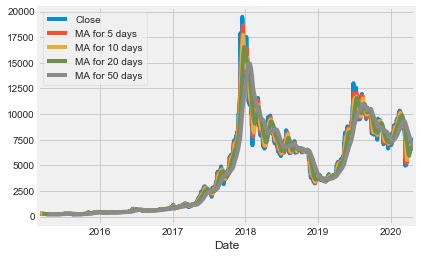

<Figure size 1944x1656 with 0 Axes>

In [7]:
btc5[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 20 days','MA for 50 days']].plot()
plt.figure(figsize=(27, 23))

# Daily Return of Stock

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. 

In [8]:
#Finding the daily percentage change

btc5['Daily Return'] = btc5['Close'].pct_change()

<Figure size 1944x2376 with 0 Axes>

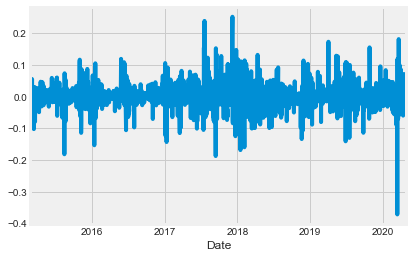

<Figure size 1944x2376 with 0 Axes>

In [9]:
btc5['Daily Return'].plot()
plt.figure(figsize=(27,33))

Great, now let's get an overall look at the average daily return using a histogram

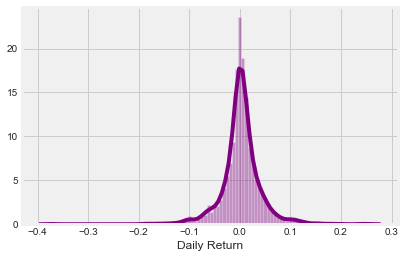

In [10]:
sns.distplot(btc5['Daily Return'].dropna(), bins=100, color='purple')

# Reading Stock close value of Apple,Amazon,Netflix,Google,FB,Bit coins,Usdt

In [11]:
mergeddata = pd.read_csv("C:/Users/vignesh/Desktop/Stock Data/Mergeddata.csv",index_col='Date',parse_dates=['Date'])

In [57]:
mergeddata.head()

,BTC,USDT,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,,,
2015-02-03,275.67,0.606502,79.750000,129.089996,385.660004,68.607140,569.775696
2015-03-03,281.70,0.606229,79.599998,129.360001,384.609985,67.815712,572.069397
2015-06-03,272.72,1.000000,80.010002,126.599998,380.089996,64.874283,566.130676
2015-09-03,289.61,1.000000,79.440002,127.139999,378.559998,63.661430,567.292480
2015-10-03,291.76,1.000000,77.550003,124.510002,369.510010,62.151428,553.490417


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks

In [12]:
# Make a new tech returns DataFrame
returns = mergeddata.pct_change()
returns.head()

,BTC,USDT,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,,,
2015-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,0.021874,-0.000450,-0.001881,0.002092,-0.002723,-0.011536,0.004026
2015-06-03,-0.031878,0.649542,0.005151,-0.021336,-0.011752,-0.043374,-0.010381
2015-09-03,0.061932,0.000000,-0.007124,0.004265,-0.004025,-0.018695,0.002052
2015-10-03,0.007424,0.000000,-0.023792,-0.020686,-0.023906,-0.023719,-0.024330


Now we can compare the daily percentage return of two stocks to check how correlated. 

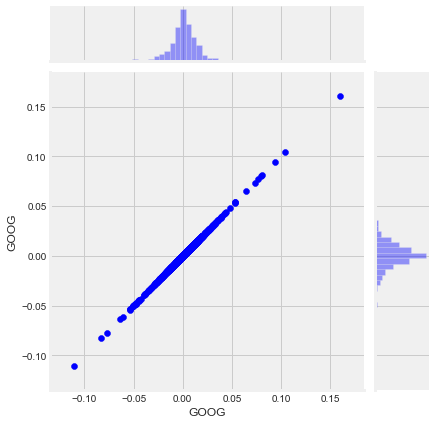

In [58]:
#Comparing google to itself, expecting a linear relationship 
sns.jointplot('GOOG', 'GOOG', returns, kind='scatter', color='blue')

There is 100% of linear relationship

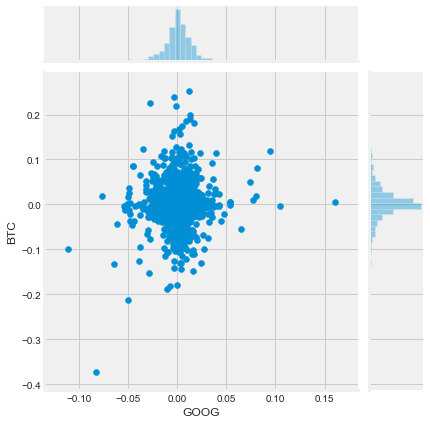

In [14]:
sns.jointplot('GOOG', 'BTC', returns, kind='scatter')

We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons

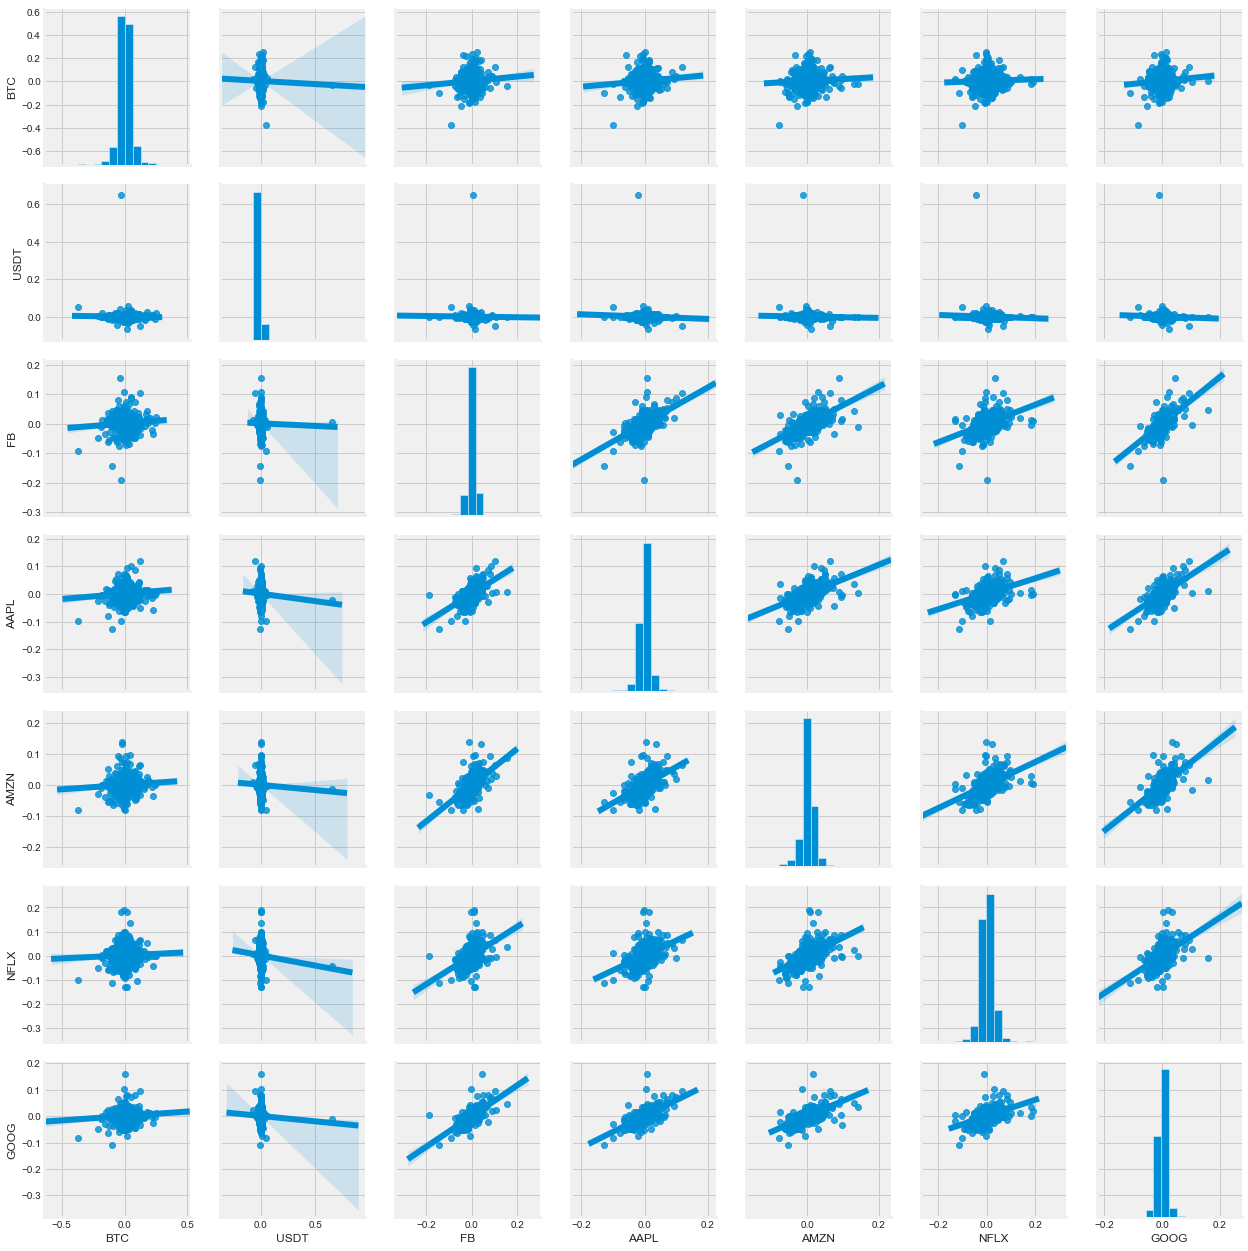

In [15]:
#Constructing plots to look at all the data
sns.pairplot(returns, kind='reg')

we can see Google has linear relationship on FB,Apple,Amazon,Netflix

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks'

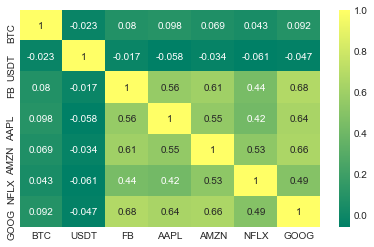

In [16]:
sns.heatmap(returns.corr(), annot=True, cmap='summer')

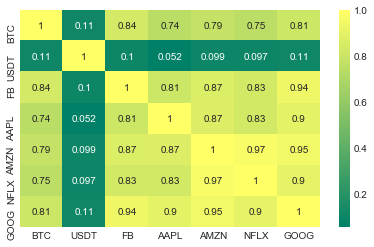

In [17]:
sns.heatmap(mergeddata.corr(), annot=True, cmap='summer')

We can see Amazon and netflix has 97% on coorelation. It's also interesting to see that all the technology comapnies are positively correlated.

# LSTM

PREDICTING STOCK PRICES - LONG SHORT TERM MEMORY (LSTM)

In [18]:
btc.head()

,Close,Volume,Market Cap
Date,,,
2015-03-01,260.20,25213700,3615181538
2015-03-02,275.67,40465700,3831178959
2015-03-03,281.70,50461300,3916108523
2015-03-04,273.09,41383000,3797385224
2015-03-05,276.18,41302400,3841201000


Importing file which has only close values

In [89]:
data = pd.read_csv("C:/Users/vignesh/Desktop/Stock Data/Bitcoin/trial.csv") 
btc_close = data.filter(['Close'])
btc_close.head()

,Close
0,275.67
1,281.70
2,273.09
3,276.18
4,272.72


In [90]:
dataval = btc_close.values

Taking 80% values as training data

In [91]:
training_data_len = int(np.ceil( len(dataval) * .8 ))

print(training_data_len)

1507


We have 1507 observations which is 80 % of total

# Scaling

The data for your sequence prediction problem probably needs to be scaled when training a neural network, such as a Long Short-Term Memory recurrent neural network.

When a network is fit on unscaled data that has a range of values (e.g. quantities in the 10s to 100s) it is possible for large inputs to slow down the learning and convergence of your network and in some cases prevent the network from effectively learning your problem.

In [92]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataval)

print(scaled_data)

[[0.00337949]
 [0.00369214]
 [0.00324572]
 ...
 [0.38059026]
 [0.38157745]
 [0.38727717]]


In [93]:
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :] #taking 80 % of data as trained data

#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00337949, 0.00369214, 0.00324572, 0.00340594, 0.00322654,
       0.00341008, 0.00331105, 0.00410226, 0.00421374, 0.00445328,
       0.00434803, 0.00388087, 0.00370199, 0.00393531, 0.00415308,
       0.00388968, 0.00237519, 0.00261525, 0.00265776, 0.00256806,
       0.00297974, 0.00291649, 0.00182041, 0.00185151, 0.00197232,
       0.00189455, 0.00219372, 0.00167056, 0.00192047, 0.00174885,
       0.00190699, 0.0022046 , 0.00227253, 0.00224038, 0.00259814,
       0.00233319, 0.00221342, 0.00179033, 0.00172086, 0.00132629,
       0.00135118, 0.00133044, 0.00073107, 0.00044953, 0.00069166,
       0.00093742, 0.0006424 , 0.00066729, 0.00062789, 0.00073314,
       0.00128481, 0.00122829, 0.00134651, 0.00107741, 0.00082439,
       0.00046353, 0.00097475, 0.0007964 , 0.00079432, 0.00133044])]
[0.00111941207793265]

[array([0.00337949, 0.00369214, 0.00324572, 0.00340594, 0.00322654,
       0.00341008, 0.00331105, 0.00410226, 0.00421374, 0.00445328,
       0.00434803, 0.00388087, 0.00

In [94]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [95]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1447, 60, 1)

In [96]:
from keras.models import Sequential
from keras.layers import Dense, LSTM


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [97]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [98]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1447/1447 [==============================] - 44s 31ms/step - loss: 0.0023 0s - loss: 


In [99]:
#Create the testing data set
#Create a new array containing scaled values from index 1447 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataval[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [100]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [101]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [102]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [107]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

587.1887218947106

In [108]:
from sklearn import metrics
r2_test = metrics.r2_score(y_test, predictions)
print("R2 value for test: ", r2_test)

R2 value for test:  0.876140120978248


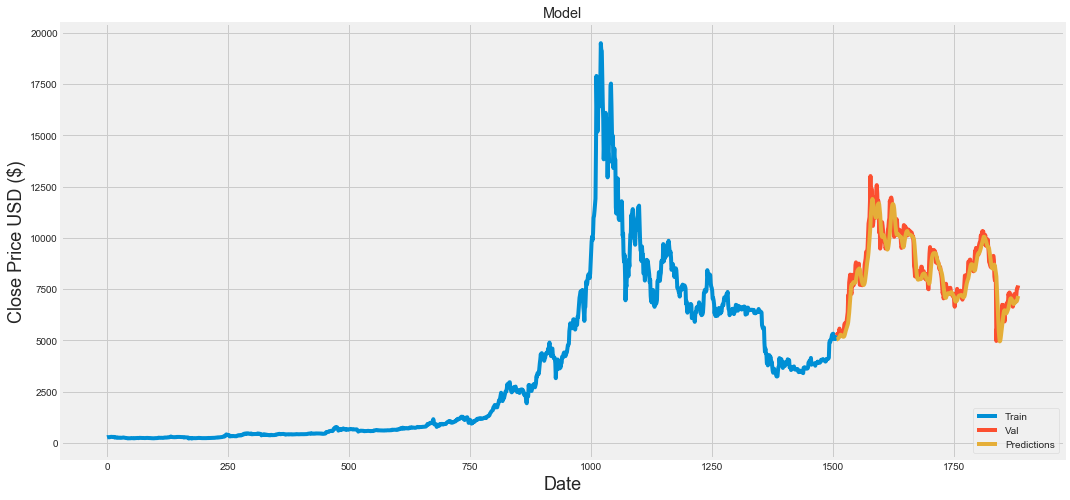

In [109]:
# Plot the data
train = btc_close[:training_data_len]
valid = btc_close[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [35]:
#valid
from sklearn.metrics import r2_score
r2_score(valid['Close'], valid['Predictions'])
#0.77 per cent accuracy!

-0.6856774265124956

Predicting BTC Stock based on other stock values

In [36]:
mergeddata.head()

,BTC,USDT,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,,,
2015-02-03,275.67,0.606502,79.750000,129.089996,385.660004,68.607140,569.775696
2015-03-03,281.70,0.606229,79.599998,129.360001,384.609985,67.815712,572.069397
2015-06-03,272.72,1.000000,80.010002,126.599998,380.089996,64.874283,566.130676
2015-09-03,289.61,1.000000,79.440002,127.139999,378.559998,63.661430,567.292480
2015-10-03,291.76,1.000000,77.550003,124.510002,369.510010,62.151428,553.490417


In [64]:
df=mergeddata

In [66]:
df.head()

,BTC,USDT,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,,,
2015-02-03,275.67,0.606502,79.750000,129.089996,385.660004,68.607140,569.775696
2015-03-03,281.70,0.606229,79.599998,129.360001,384.609985,67.815712,572.069397
2015-06-03,272.72,1.000000,80.010002,126.599998,380.089996,64.874283,566.130676
2015-09-03,289.61,1.000000,79.440002,127.139999,378.559998,63.661430,567.292480
2015-10-03,291.76,1.000000,77.550003,124.510002,369.510010,62.151428,553.490417


Scaling

In [117]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df[['BTC','USDT','FB','AAPL','AMZN','NFLX','GOOG']] = scaler.fit_transform(df[['BTC','USDT','FB','AAPL','AMZN','NFLX','GOOG']])

In [118]:
df.head()

,BTC,USDT,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,,,
2015-02-03,0.003448,0.000576,0.015710,0.163599,0.009438,0.025227,0.052429
2015-03-03,0.003767,0.000000,0.014681,0.164739,0.008924,0.023145,0.054700
2015-06-03,0.003292,0.831142,0.017493,0.153086,0.006713,0.015407,0.048819
2015-09-03,0.004185,0.831142,0.013583,0.155366,0.005964,0.012217,0.049970
2015-10-03,0.004299,0.831142,0.000617,0.144262,0.001536,0.008245,0.036302


In [119]:
X = np.array(df.loc[:,df.columns!='BTC'])
Y = np.array(df.loc[:,df.columns=='BTC'])

In [120]:
print(df.shape)
print(X.shape)
print(Y.shape)

(1296, 7)
(1296, 6)
(1296, 1)


Random Search CV

In [121]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics

Model Function

In [72]:
def regression(X, Y, reg, param_grid, test_size=0.20):
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
      
    
    reg = RandomizedSearchCV(reg,parameters, cv = 10,refit = True)
    reg.fit(X_train, Y_train)     

    return X_train, X_test, Y_train, Y_test, reg

Evaluation Function

In [73]:

def evaluation_metrics(X_train, X_test, Y_train, Y_test, reg):
    Y_pred_train = reg.best_estimator_.predict(X_train)
    Y_pred_test = reg.best_estimator_.predict(X_test)
    
    print("Best Parameters:",reg.best_params_)
    print('\n')
    print("Mean cross-validated score of the best_estimator : ", reg.best_score_) 
    print('\n')
    MAE_train = metrics.mean_absolute_error(Y_train, Y_pred_train)
    MAE_test = metrics.mean_absolute_error(Y_test, Y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
    print('\n')
    MSE_train = metrics.mean_squared_error(Y_train, Y_pred_train)
    MSE_test = metrics.mean_squared_error(Y_test, Y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
    print('\n')
    RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
    print('\n')
    r2_train = metrics.r2_score(Y_train, Y_pred_train)
    r2_test = metrics.r2_score(Y_test, Y_pred_test)
    print("R2 value for train: ", r2_train)
    print("R2 value for test: ", r2_test)

# Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression

In [122]:
reg = LinearRegression()
parameters = {'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}
X_train, X_test, Y_train, Y_test, linreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = linreg)

Best Parameters: {'normalize': True, 'fit_intercept': True, 'copy_X': True}


Mean cross-validated score of the best_estimator :  0.724287686423845


MAE for training set is 0.07654172836264567
MAE for test set is 0.07718969292812114


MSE for training set is 0.012041337404472885
MSE for test set is 0.012142781475057965


RMSE for training set is 0.10973302786523702
RMSE for test set is 0.11019428966628882


R2 value for train:  0.7274633612262076
R2 value for test:  0.729583813753646


# Decision Tree Regressor

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [123]:
reg = DecisionTreeRegressor()
parameters = {'max_depth':[5,6,7,8,9,10]}
X_train, X_test, Y_train, Y_test, DTreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = DTreg)

Best Parameters: {'max_depth': 9}


Mean cross-validated score of the best_estimator :  0.9454165104825293


MAE for training set is 0.007476854393441219
MAE for test set is 0.023092698113974037


MSE for training set is 0.00029279253410649064
MSE for test set is 0.0026958769921086785


RMSE for training set is 0.017111181552028797
RMSE for test set is 0.05192183540774226


R2 value for train:  0.9933731037987689
R2 value for test:  0.9399636091374327


# Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor

In [79]:
reg = RandomForestRegressor(n_jobs=-1)
parameters = {'n_estimators':[10,15,20,25],'max_depth':[5,6,7,8,9,10]}
X_train, X_test, Y_train, Y_test, RFreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = RFreg)

Best Parameters: {'n_estimators': 15, 'max_depth': 10}


Mean cross-validated score of the best_estimator :  0.9655781126090865


MAE for training set is 161.8296164334918
MAE for test set is 392.3972117804052


MSE for training set is 110992.06343251075
MSE for test set is 656978.1084599271


RMSE for training set is 333.154713958111
RMSE for test set is 810.5418610163988


R2 value for train:  0.9929701185276669
R2 value for test:  0.9590577873031486


# Gradient Boosting Regressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
reg = GradientBoostingRegressor()
parameters = {'alpha':[0.01,0.001,0.0001],'n_estimators':[100,150,200],'max_depth':[3,5,7]}
X_train, X_test, Y_train, Y_test, XGreg = regression(X, Y, reg, param_grid=parameters, test_size=0.20)
evaluation_metrics(X_train, X_test, Y_train, Y_test, reg = XGreg)

Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'alpha': 0.0001}


Mean cross-validated score of the best_estimator :  0.9667520485073293


MAE for training set is 53.320582332442456
MAE for test set is 383.5511228624531


MSE for training set is 6270.530386738665
MSE for test set is 565023.7290661344


RMSE for training set is 79.1866806144737
RMSE for test set is 751.680603092919


R2 value for train:  0.9996028447077728
R2 value for test:  0.964788291426601


Compared to other models Linear regression performs well as both train set and test set error are nearly same. Other models are overfitting the data.

# Best Estimator

In [85]:
linreg.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

# Actual Vs Predicted

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [87]:
Y_Pred_test = linreg.best_estimator_.predict(X_test)

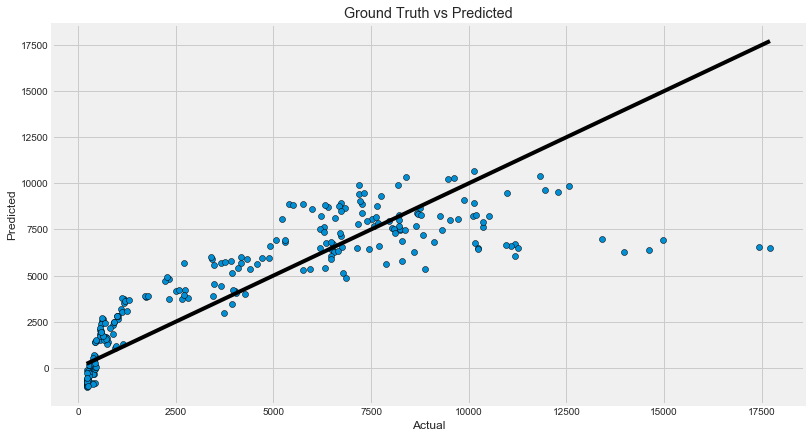

In [88]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(Y_test, Y_Pred_test, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k-', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()